<a href="https://colab.research.google.com/github/roon-byte/llm-examples/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 9.86MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
print(path)

/root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv')

# Check the first few rows
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
data = pd.read_csv('/root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv')

# Step 2: Select features and target
X = data[['Age', 'BMI', 'Glucose', 'BloodPressure', 'Insulin', 'Pregnancies']]  # Features
y = data['Outcome']  # Target variable

# Step 3: Check and handle missing values
print("Missing values:\n", X.isnull().sum())  # Display missing values per column
X = X.fillna(X.mean())  # Fill missing values with column mean

# Step 4: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))  # Classification report

Missing values:
 Age              0
BMI              0
Glucose          0
BloodPressure    0
Insulin          0
Pregnancies      0
dtype: int64
Accuracy: 0.7207792207792207
Confusion Matrix:
 [[77 22]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a new model with optimized parameters
best_model = LogisticRegression(C=0.01, solver='liblinear')  # Replace 'liblinear' with the correct solver if needed
best_model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model with the best parameters
best_model = LogisticRegression(C=0.01, solver='liblinear')
best_model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
# Predict the target variable on the test set
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[90  9]
 [33 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        99
           1       0.71      0.40      0.51        55

    accuracy                           0.73       154
   macro avg       0.72      0.65      0.66       154
weighted avg       0.72      0.73      0.70       154



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 10, 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize Logistic Regression with the best parameters
model_best = LogisticRegression(C=best_params['C'], solver=best_params['solver'])

# Train the model with the training data
model_best.fit(X_train, y_train)

# Make predictions
y_pred_best = model_best.predict(X_test)

# Evaluate the model performance
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model with the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the target variable on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[79 20]
 [19 36]]


In [ ]:
from sklearn.metrics import classification_report

# Print the classification report to see precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# Get prediction probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., 0.4)
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Re-evaluate with adjusted threshold
from sklearn.metrics import classification_report
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.60      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154



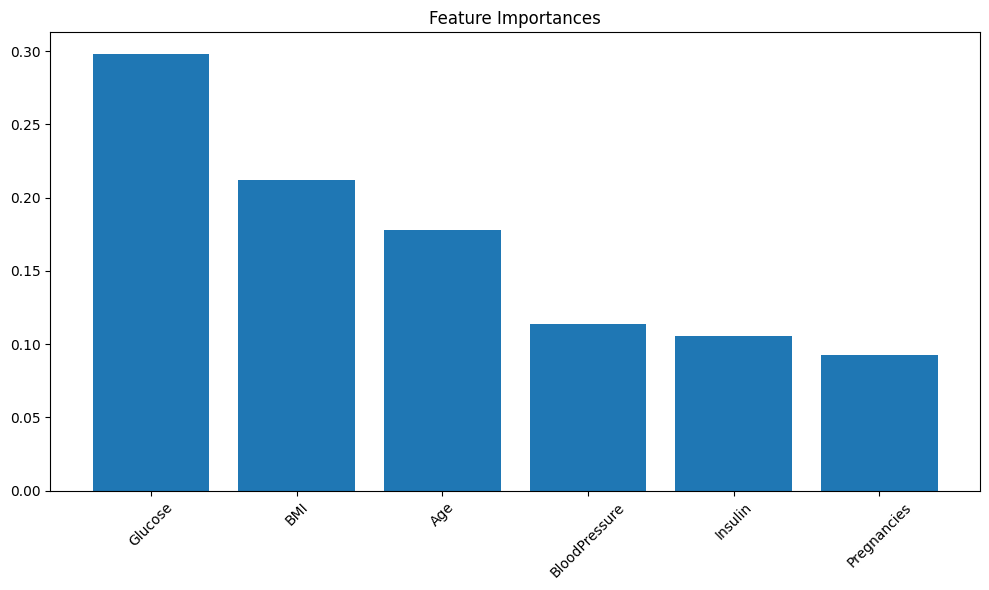

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Confusion Matrix:
[[81 18]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



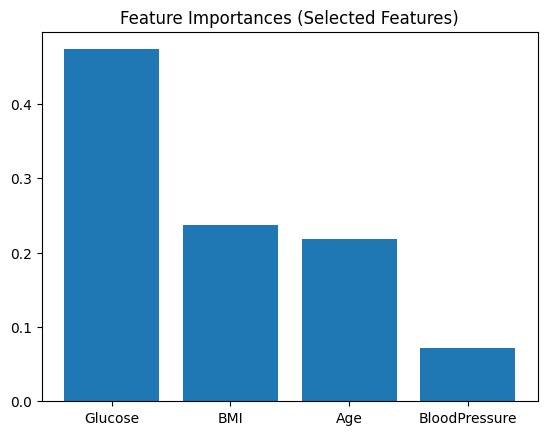

In [ ]:
# Step 1: Feature Selection
selected_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 2: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_selected, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 3: Train with Best Parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Step 4: Predictions and Evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred_best_rf = best_rf_model.predict(X_test_selected)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Step 5: Feature Importance
import matplotlib.pyplot as plt

importances = best_rf_model.feature_importances_
plt.bar(selected_features, importances)
plt.title("Feature Importances (Selected Features)")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the parameter grid for tuning
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',# Use accuracy as the scoring metric
    n_iter=50,         # Number of random combinations to try
    random_state=42    # For reproducibility
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict using the best model
y_pred_rf = rf_model_best.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
[[77 22]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [ ]:
# Get the best model from the random search
rf_model_best = random_search.best_estimator_

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
# Train the model again using the resampled data
rf_model_best.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=5, max_features=None, random_state=42)

In [ ]:
y_pred_resampled = rf_model_best.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_resampled))

# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_resampled))

Confusion Matrix:
[[69 30]
 [11 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        99
           1       0.59      0.80      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154



In [ ]:
# Get probabilities for class '1'
y_pred_probs_resampled = rf_model_best.predict_proba(X_test)[:, 1]

# Adjust threshold to improve recall for class '1'
y_pred_adjusted_resampled = (y_pred_probs_resampled > 0.4).astype(int)  # Adjust threshold

# Evaluate adjusted predictions
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted_resampled))

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        99
           1       0.56      0.84      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.76      0.71      0.71       154



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(rf_model_best, param_grid, n_iter=10, random_state=42)
random_search.fit(X_train_res, y_train_res)

# Get the best model
rf_best = random_search.best_estimator_

# Evaluate the best model
y_pred_best = rf_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        99
           1       0.58      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



In [ ]:
# Get the predicted probabilities for class 1
y_pred_probs = rf_model_best.predict_proba(X_test)[:, 1]

# Adjust threshold to 0.4 or another value
y_pred_adjusted = (y_pred_probs > 0.4).astype(int)

# Evaluate the adjusted predictions
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        99
           1       0.56      0.84      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.76      0.71      0.71       154



In [ ]:
# Re-run Grid Search or Random Search
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(rf_model_best, param_grid, n_iter=10, random_state=42)
random_search.fit(X_train_res, y_train_res)

rf_best = random_search.best_estimator_

# Evaluate with best model
y_pred_best = rf_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        99
           1       0.58      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



In [ ]:
y_pred_probs = rf_model_best.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_pred_adjusted = (y_pred_probs > 0.4).astype(int)  # Adjust threshold to 0.4 or any value you see fit

print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        99
           1       0.56      0.84      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.76      0.71      0.71       154



In [ ]:
y_pred_probs = rf_model_best.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1
y_pred_adjusted = (y_pred_probs > 0.3).astype(int)  # Adjust threshold further to 0.3 or 0.2

print("Adjusted Classification Report (Threshold 0.3):")
print(classification_report(y_test, y_pred_adjusted))

Adjusted Classification Report (Threshold 0.3):
              precision    recall  f1-score   support

           0       0.87      0.56      0.68        99
           1       0.52      0.85      0.64        55

    accuracy                           0.66       154
   macro avg       0.69      0.71      0.66       154
weighted avg       0.75      0.66      0.67       154



In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model_best, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.89655172 0.94186047 0.88372093 0.95348837 0.94186047]
Mean accuracy: 0.9234963913392141


In [ ]:
# Evaluate the model on the test set
y_pred_test = rf_model_best.predict(X_test)
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred_test))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        99
           1       0.59      0.80      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.73      0.74       154



In [ ]:
# Adjust decision threshold
y_pred_probs = rf_model_best.predict_proba(X_test)[:, 1]  # Probabilities for class 1
threshold = 0.6  # Increase threshold to 0.6 for more conservative predictions for class 1
y_pred_adjusted = (y_pred_probs > threshold).astype(int)

# Evaluate with adjusted threshold
from sklearn.metrics import classification_report
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



In [ ]:
# Try a different threshold, for example, 0.65 or 0.55
threshold = 0.65  # or 0.55
y_pred_adjusted = (y_pred_probs > threshold).astype(int)

# Evaluate with adjusted threshold
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_adjusted))

Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# Example: Trying threshold 0.60
threshold = 0.60
y_pred_adjusted = (y_pred_probs > threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



In [ ]:
# Adjusting class weights in Random Forest model
rf_model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train_res, y_train_res)
y_pred_weighted = rf_model_weighted.predict(X_test)
print("Classification Report with Weighted Classes:")
print(classification_report(y_test, y_pred_weighted))

Classification Report with Weighted Classes:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        99
           1       0.58      0.80      0.67        55

    accuracy                           0.72       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.72      0.73       154



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_res, y_train_res)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75        99
           1       0.57      0.82      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.8183654729109274


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)

print(f"Best Parameters: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]  # Correct values for max_features
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Using the best parameters to refit the model
best_rf = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(X_test)  # Assuming X_test and y_test are your test data

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69 30]
 [ 9 46]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        99
           1       0.61      0.84      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.78      0.75      0.75       154



In [ ]:
best_rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, max_features='sqrt', random_state=42)
best_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred = best_rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        99
           1       0.61      0.84      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.78      0.75      0.75       154

[[69 30]
 [ 9 46]]


In [ ]:
proba = best_rf.predict_proba(X_test)[:, 1]
threshold = 0.4  # adjust based on your requirements
y_pred_adjusted = (proba >= threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        99
           1       0.57      0.84      0.68        55

    accuracy                           0.72       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.72      0.73       154



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_rf, X_train_res, y_train_res, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.90804598 0.95348837 0.89534884 0.98837209 0.96511628]
Mean cross-validation score: 0.9420743116813686


In [ ]:
feature_importance = best_rf.feature_importances_
feature_names = X_train.columns
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

         Feature  Importance
2        Glucose    0.459688
1            BMI    0.184957
0            Age    0.167852
4        Insulin    0.075237
3  BloodPressure    0.062097
5    Pregnancies    0.050169


In [ ]:
import joblib
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
import joblib
# Load the model from the saved file
best_rf_loaded = joblib.load('random_forest_model.pkl')

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming best_rf is the trained RandomForest model
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
pip install flask